<a href="https://colab.research.google.com/github/mikelabadie/DashTracker/blob/master/Dash_Route_Mapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installs

In [0]:
!apt install proj-bin libproj-dev libgeos-dev

In [0]:
!pip install -U git+https://github.com/matplotlib/basemap.git

In [0]:
import requests
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

## Various Calls to the Dash Tracker

In [0]:
#%% get routes
request_command = "getroutes"
request_parameters = ""
request_string = "http://tracker.dashbus.com/bustime/api/v3/"+request_command+"?key=mDB3WTtEHgb9PmrEj5BhWnh4v&format=json"+request_parameters
data = requests.get(request_string)
routes=data.json()

#%% get vehicles
request_command = "getvehicles"
request_parameters = "&rt=AT2"
request_string = "http://tracker.dashbus.com/bustime/api/v3/"+request_command+"?key=mDB3WTtEHgb9PmrEj5BhWnh4v&format=json"+request_parameters
data = requests.get(request_string)
vehicles=data.json()

#%% get directions
request_command = "getdirections"
request_parameters = "&rt=AT2"
request_string = "http://tracker.dashbus.com/bustime/api/v3/"+request_command+"?key=mDB3WTtEHgb9PmrEj5BhWnh4v&format=json"+request_parameters
data = requests.get(request_string)
directions=data.json()

#%% get stops
request_command = "getstops"
request_parameters = "&rt=AT2&dir=EASTBOUND"
request_string = "http://tracker.dashbus.com/bustime/api/v3/"+request_command+"?key=mDB3WTtEHgb9PmrEj5BhWnh4v&format=json"+request_parameters
data = requests.get(request_string)
stops=data.json()

#%% get patterns
request_command = "getpatterns"
request_parameters = "&rt=AT6"
request_string = "http://tracker.dashbus.com/bustime/api/v3/"+request_command+"?key=mDB3WTtEHgb9PmrEj5BhWnh4v&format=json"+request_parameters
data = requests.get(request_string)
patterns=data.json()
patterns=patterns.get("bustime-response")
patterns=patterns.get("ptr")
patterns=list(filter(lambda pattern: pattern['rtdir'] == 'EASTBOUND', patterns))[0]
patterns=patterns.get("pt")
patterns=pd.DataFrame(patterns)

## Map a Route

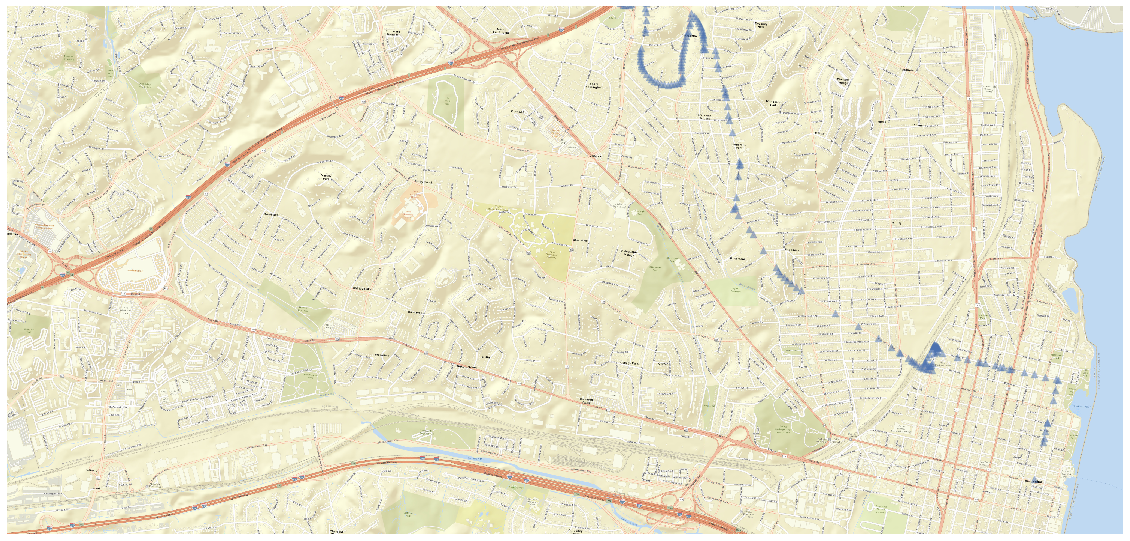

In [15]:
#%% draw a route map

# get route information
request_command = "getpatterns"
request_parameters = "&rt=AT4"
request_string = "http://tracker.dashbus.com/bustime/api/v3/"+request_command+"?key=mDB3WTtEHgb9PmrEj5BhWnh4v&format=json"+request_parameters
data = requests.get(request_string)
patterns=data.json()
patterns=patterns.get("bustime-response")
patterns=patterns.get("ptr")
patterns=list(filter(lambda pattern: pattern['rtdir'] == 'SOUTHBOUND', patterns))[0]
patterns=patterns.get("pt")
patterns=pd.DataFrame(patterns)

# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(llcrnrlon=-77.142700,llcrnrlat=38.795370,
            urcrnrlon=-77.036828,urcrnrlat=38.841380,
            lat_0 =38.814166, lon_0 =-77.077254,
            resolution='l', projection='cass', epsg=2805)
m.arcgisimage(service="World_Street_Map", xpixels = 10000, verbose= False)

# 2. scatter city data
lat = patterns['lat'].values
lon = patterns['lon'].values
m.scatter(lon, lat, latlon=True, marker='^', cmap='Reds', alpha=0.5)

x = [38.822470]
y = [-77.077208]
m.scatter(x, y, latlon=True, marker='o', cmap='Reds', alpha=1.0)

plt.show()